In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
# Train data
train_x = np.loadtxt("../Data/trn_x.txt")
train_x_label = np.loadtxt("../Data/trn_x_class.txt")

train_y = np.loadtxt("../Data/trn_y.txt")
train_y_label = np.loadtxt("../Data/trn_y_class.txt")

# Test data
test_y_126 = np.loadtxt("../Data/tst_y_126.txt")
test_y_126_label = np.loadtxt("../Data/tst_y_126_class.txt")

test_xy = np.loadtxt("../Data/tst_xy.txt")
test_xy_label = np.loadtxt("../Data/tst_xy_class.txt")

test_xy_126 = np.loadtxt("../Data/tst_xy_126.txt")
test_xy_126_label = np.loadtxt("../Data/tst_xy_126_class.txt")

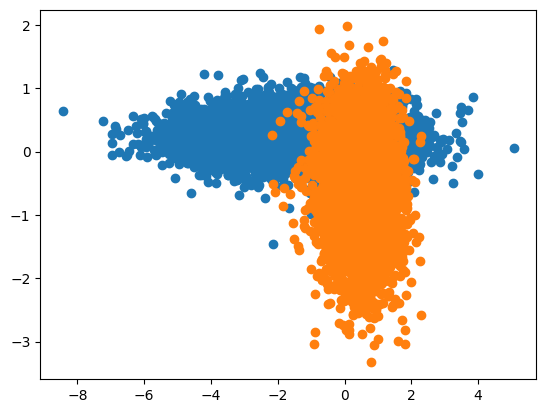

In [14]:
#Scatterplots to visualize distributions
plt.scatter(train_x[:, 0], train_x[:, 1])
plt.scatter(train_y[:, 0], train_y[:, 1])

plt.show()

In [15]:
# x statistics
train_x_mean = train_x.mean(axis=0)
train_x_cov = np.cov(train_x, rowvar=False)

# y statistics
train_y_mean = train_y.mean(axis=0)
train_y_cov = np.cov(train_y, rowvar=False)

# priors
x_length = np.shape(train_x)[0]
y_length = np.shape(train_y)[0]
prior_x = x_length / (x_length + y_length)
prior_y = y_length / (x_length + y_length)

In [16]:
#Likelihood of data coming from a 3-D gaussian with given mean and cov
def likelihood(data, mean, cov):
        a = -0.5 * np.matmul((data - mean), np.linalg.inv(cov))
        b = np.matmul(a,(data - mean))
        likelihood = (1 / (2 * np.pi)) * (1 / (np.linalg.det(cov) ** (1/2)) * np.exp(b))
        return(likelihood)

#The posterior probability of data belonging to class '1'
#In the case of binary classification we only need to calculate the posterior for one of the two classes.
def posterior(data, mean, cov):
    posterior = (likelihood(data, train_x_mean, train_x_cov) * prior_x) / ((likelihood(data, train_x_mean, train_x_cov) * prior_x) + (likelihood(data, train_y_mean, train_y_cov) * prior_y))
    return(posterior)

#The classifier function accepts the posterior and outputs '1' or '2'
def classifier(post):
        if post >= 0 and post <= 1:
                if post >= 0.5:
                        return(1)
                else:
                        return(2)
        else:
                return(0)

Classify instances in tst_xy, and use the corresponding label file tst_xy_class to calculate the accuracy

In [18]:
class_result = np.zeros(np.size(test_xy))
for counteri, i in enumerate(test_xy):

    post = posterior(i, train_x_mean, train_x_cov)
    print(post)

    

    # class_result[counteri] = classifier(post)
# unique, counts = np.unique(class_result, return_counts=True)
# print(np.asarray((unique, counts)).T)


0.9999431572061616
0.9985203092182479
0.9178748902463975
0.3857327931089684
0.8848645266709957
0.9794701673560223
0.9999372016474355
0.9924020890176173
0.9999999903116589
0.9998315754668725
0.8828052851511304
0.9996626454222066
0.9143275840204004
0.9999978049955828
0.999999999999628
0.9999999999999967
0.5352112163849112
1.0
0.9925345357914088
0.9999726726111008
0.8180567663329091
0.9999987840788715
0.9999012795692039
0.602668071337332
0.9999772587447586
0.9538793162116199
0.9067980485597191
0.45339705258456664
0.9998959588899963
0.9774355876075348
0.5184495316780264
0.9999871808448082
1.0
0.9999722936301297
0.36391674563346904
0.9832592468399581
0.9999999999999989
0.9999999899936347
0.9552450182231454
0.9953809031617983
0.9999999934320545
0.9999971486194418
0.9991979826636557
0.9999664888903627
0.9999286681845
0.9999897838470763
0.9997930359213887
0.9992367154965679
0.5939156657530278
0.9937127025370733
0.602113659706951
0.9999999999997088
0.9990187589851989
0.9999999990858721
0.622155

C:\Users\vismi\AppData\Local\Temp\ipykernel_15260\702112042.py:11: RuntimeWarning: invalid value encountered in scalar divide
  posterior = (likelihood(data, train_x_mean, train_x_cov) * prior_x) / ((likelihood(data, train_x_mean, train_x_cov) * prior_x) + (likelihood(data, train_y_mean, train_y_cov) * prior_y))


0.0008282897899053631
1.0523726308102436e-07
0.26609446662422587
0.07257359350841706
7.831237356157378e-06
0.3436550425570122
2.072768501783074e-06
5.5764687541081614e-05
0.09530533171779064
0.5329778144478996
0.01966421085685181
0.0016538401030265887
0.10575729826820202
0.021780984716184445
0.06757360018075359
0.0911571262295046
2.227563843690488e-09
0.09718025125499642
1.208593670808149e-17
1.4891267517509015e-09
4.4649019548208015e-05
0.00040733041579266806
0.0004926837608995434
0.012249730884503889
0.014447619478375992
0.0037809050644475968
0.39260932681727617
0.026194846451191453
0.5512918004914825
0.0001964302842225628
2.9049510950396118e-05
1.2025553881347194e-08
0.013170793745383325
0.5357383243415891
0.0007556301986682445
3.630843484354717e-05
1.650663112653907e-05
1.1487231451571768e-07
0.0170973638621788
5.38034018497103e-09
0.003516511934281256
3.5663130510939465e-05
0.00031962463827148413
0.011373382699806214
0.029565678547329152
0.07112587786403252
0.39839032594833124
2.9